## Fashion MNIST adatset Adaboost klasszifikáció 

### Adatok feltöltése

In [0]:
from google.colab import files

uploaded = files.upload()

### Adatok betöltése

In [0]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
test =  pd.read_csv('fashion-mnist_test.csv')

### Adatok előkészítése

In [0]:
from sklearn.preprocessing import label_binarize

y=df['label']
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
X=df.drop('label', axis=1)
X=X/255

y_test=test['label']
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_test=test.drop('label', axis=1)
X_test=X_test/255

### Dimenzió csökkentés

Szinguláris érték felbontással 784 dimenziós adatokból kiválasztotjuk a 20 főkomponenst.

In [0]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=7, random_state=42)
svd.fit(X)
X=svd.transform(X)

svd.fit(X_test)
X_test=svd.transform(X_test)

### Paraméterek keresése 
Random foresthez mélységhez és a fák számosságára paraméterkeresés.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_gridrf = {"max_depth" : [1,2,3,5],
              "n_estimators": [5,20,50,100]
             }

rdf = RandomForestClassifier(random_state=42)

gsrf = GridSearchCV(rdf, param_grid=param_gridrf, cv=3, n_jobs=-1, scoring='accuracy')
gsrf.fit(X,y_bin)


print(gsrf.best_params_)
print(gsrf.best_score_)

{'max_depth': 5, 'n_estimators': 100}
0.41975


In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

rdf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rdf.fit(X,y)
predrf = rdf.predict(X_test)

#Kitérő plothoz
svdsek=[]
eredetin=[]
rangok = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50,60,70,80,90,100]
for i in rangok:
 

  svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
  svd.fit(X)
  X_svd=svd.transform(X)

  svd.fit(X_test)
  X_test_svd=svd.transform(X_test)
  
  rdfsvd = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
  rdfsvd.fit(X_svd,y)
  
  predsvded = rdfsvd.predict(X_test_svd)
  svdsek.append(accuracy_score(y_test, predsvded))
  eredetin.append(accuracy_score(y_test, predrf))
  
print(eredetin)
print(svdsek)

[0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618, 0.7618]
[0.2842, 0.5364, 0.6104, 0.6742, 0.6973, 0.7062, 0.7132, 0.7096, 0.717, 0.7241, 0.7331, 0.7304, 0.7295, 0.7322, 0.7358, 0.7433, 0.7399, 0.7419, 0.742, 0.7339, 0.742, 0.7411, 0.7482, 0.74, 0.7401]


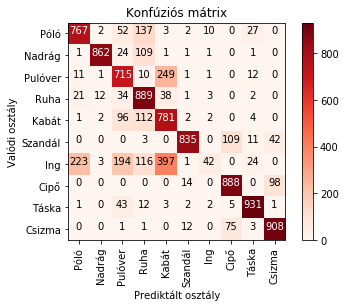

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

classes = {0: 'Póló',1: 'Nadrág',2: 'Pulóver',3: 'Ruha',4: 'Kabát',5: 'Szandál',6: 'Ing',7: 'Cipő',8: 'Táska',9: 'Csizma'}
num_classes         = len(classes)
classes_fashion     = ['Póló','Nadrág','Pulóver','Ruha','Kabát','Szandál','Ing','Cipő','Táska','Csizma']

predictions = predrf
cm=confusion_matrix(y_test, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Konfúziós mátrix')
tick_marks = np.arange(len(classes_fashion))
plt.xticks(tick_marks, classes_fashion, rotation=90)
plt.yticks(tick_marks, classes_fashion)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valódi osztály')
plt.xlabel('Prediktált osztály')
plt.colorbar()
plt.show()